## **Next-Generation Agricultural Market Forecasting and Insights System for Kenya**

### Business Understanding
### Business Overview

Kenya’s economic stability is intrinsically linked to the performance of its agricultural sector, which serves as both a primary GDP contributor and the backbone of livelihoods for millions of households. However, the sector continues to face structural inefficiencies characterized by persistent price volatility, fragmented market coordination, information asymmetry, and sentiment-driven demand fluctuations. These systemic challenges erode income predictability for farmers and traders, constrain value chain optimization, and ultimately weaken overall market resilience. In a data-driven global economy, the absence of real-time market intelligence and forward-looking analytics represents a critical strategic gap. Addressing this gap through an integrated, predictive market insights and forecasting system presents a transformative opportunity to enhance transparency, stabilize incomes, strengthen decision-making, and drive sustainable economic impact across Kenya’s agricultural ecosystem.
Stakeholders and Their Gains
Farmers (Small-Scale & Large-Scale)
Gains:
Informed decisions on when and where to sell their produce for maximum profit.
Insights into seasonal price trends to optimize crop production cycles.
Awareness of public sentiment that may impact market demand.


### Traders & Distributors (Wholesalers & Retailers)
#### Gains:
Forecasting tools to plan optimal buying and selling times.
Reduction in losses due to unexpected price drops.
Better logistics planning by analyzing regional price variations.

### Consumers (General Public)
#### Gains:
Awareness of expected price changes for household budgeting.
More stable prices due to better market efficiency.
Potential for lower food costs as market inefficiencies decrease.

### Problem Statement
Kenya’s agricultural markets exhibit pronounced price volatility across regions and commodity categories, creating significant uncertainty for market participants. These fluctuations are driven by seasonal production cycles, shifting demand patterns, regional supply imbalances, and evolving public perception. For example, staple commodities such as maize experience substantial temporal and geographic price disparities, directly influencing farmers’ commercialization strategies and revenue outcomes. Compounding these structural inefficiencies is the growing influence of digital public sentiment, particularly on social media platforms, which increasingly shapes market expectations and short-term demand behavior. The convergence of these factors results in a complex and opaque decision-making environment, limiting stakeholders’ ability to optimize pricing, distribution, and market timing strategies.

### Objectives
### Assess Commodity Price Fluctuations
* Evaluate the price volatility of various commodities across different regions and time periods
* Identify the factors contributing to price fluctuations, such as seasonal variations, market demand e.t.c.
### Analyze Market Trends:
* Monitor market trends and patterns in commodity prices using historical data and advanced analytics.
* Develop predictive models to forecast future market trends and price movements.


In [61]:
#importing necessary libraries
import pandas as pd
import numpy as np
import glob
import os
import warnings
import time
import sys
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import xgboost as xgb



# importing custom scripts for different functions
sys.path.append('scripts')  # add scripts to path




# Ignore warnings
warnings.filterwarnings("ignore")

In [62]:
# Setting the directory containing our CSV files
csv_directory = "../data/Products"

# Use glob to match all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_directory, '*.csv'))

# Initialize an empty list to hold DataFrames
data_frames = []

# Iterate over the list of CSV files
for file in csv_files:
    # Read each CSV file into a DataFrame
    df = pd.read_csv(file)
    # Append the DataFrame to the list
    data_frames.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# printing part of the combined dataframe
combined_df

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date
0,Dry Onions,-,-,-,Ngurubani Market,65.00/Kg,80.00/Kg,6500.0,Kirinyaga,2026-02-11
1,Dry Onions,-,-,-,Kakamega Town,80.00/Kg,120.00/Kg,8000.0,Kakamega,2026-02-11
2,Dry Onions,-,-,-,Makutano Kirinyaga,60.00/Kg,80.00/Kg,2100.0,Kirinyaga,2026-02-11
3,Dry Onions,-,-,-,Mulot,65.00/Kg,80.00/Kg,900.0,Bomet,2026-02-11
4,Dry Onions,-,-,-,Kitale Municipality Market,60.00/Kg,70.00/Kg,3000.0,Trans-Nzoia,2026-02-11
...,...,...,...,...,...,...,...,...,...,...
57005,Banana (Ripening),-,-,-,Chuka,50.00/Kg,50.00/Kg,200.0,Tharaka-Nithi,2023-07-21
57006,Banana (Ripening),-,-,-,Kasikeu,40.00/Kg,50.00/Kg,NaN,Makueni,2023-07-21
57007,Banana (Ripening),-,-,-,Molo,-,80.00/Kg,4500.0,Nakuru,2023-07-20
57008,Banana (Ripening),-,-,-,Kerugoya,30.00/Kg,40.00/Kg,300.0,Kirinyaga,2023-07-20


In [63]:
# Displaying information about the combined DataFrame
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57010 entries, 0 to 57009
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Commodity       57010 non-null  object 
 1   Classification  57010 non-null  object 
 2   Grade           57010 non-null  object 
 3   Sex             57010 non-null  object 
 4   Market          57010 non-null  object 
 5   Wholesale       57010 non-null  object 
 6   Retail          57010 non-null  object 
 7   Supply Volume   39235 non-null  float64
 8   County          56991 non-null  object 
 9   Date            57010 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.3+ MB


In [64]:
# Saving the combined DataFrame to a new CSV file
combined_df.to_csv("combined.csv", index=False)


In [65]:
# Checking for missing values in the combined DataFrame
combined_df.isna().sum()


Commodity             0
Classification        0
Grade                 0
Sex                   0
Market                0
Wholesale             0
Retail                0
Supply Volume     17775
County               19
Date                  0
dtype: int64

## Data cleaning 

In [66]:
# 
combined_df['Commodity'].value_counts()


Cowpeas                        6000
Spinach                        3000
Dry Maize                      3000
Rice                           3000
Cowpea leaves (Kunde)          3000
Omena                          3000
Dry Onions                     3000
Beans Red Haricot (Wairimu)    3000
Banana (Cooking)               3000
Kales/Sukuma Wiki              3000
Beans (Yellow-Green)           3000
Wheat                          3000
Banana (Ripening)              3000
Finger Millet                  3000
Red Irish potato               3000
Maize Flour                    3000
Cabbages                       3000
Meat Beef                      3000
Red Sorghum                      10
Name: Commodity, dtype: int64

In [67]:
# Dropping the 'Supply Volume' column from the combined DataFrame
combined_df.drop(columns=['Supply Volume'], axis=1, inplace=True)

Dropped Supply Volume due to 17,775 missing values (~31% missing), making it unreliable for modeling.

In [68]:
# Converting the 'Date' column to datetime format
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df.head()

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,County,Date
0,Dry Onions,-,-,-,Ngurubani Market,65.00/Kg,80.00/Kg,Kirinyaga,2026-02-11
1,Dry Onions,-,-,-,Kakamega Town,80.00/Kg,120.00/Kg,Kakamega,2026-02-11
2,Dry Onions,-,-,-,Makutano Kirinyaga,60.00/Kg,80.00/Kg,Kirinyaga,2026-02-11
3,Dry Onions,-,-,-,Mulot,65.00/Kg,80.00/Kg,Bomet,2026-02-11
4,Dry Onions,-,-,-,Kitale Municipality Market,60.00/Kg,70.00/Kg,Trans-Nzoia,2026-02-11


In [69]:
# Creating a new DataFrame 
data=combined_df.drop(columns=['Classification', 'Grade', 'Sex', 'Market'], axis=1)

In [70]:
# Cleaning the 'Retail' and 'Wholesale' columns by removing specific characters and converting to numeric
for col in ['Retail', 'Wholesale']:
    data[col] = (
        data[col]
        .astype(str)
        .str.replace('/Kg', '', regex=False)
        .str.replace('-', '', regex=False)
        .str.strip()
    )


In [71]:
# Converting the cleaned 'Retail' and 'Wholesale' columns to numeric, coercing errors to NaN
for col in ['Retail', 'Wholesale']:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57010 entries, 0 to 57009
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Commodity  57010 non-null  object        
 1   Wholesale  45298 non-null  float64       
 2   Retail     54612 non-null  float64       
 3   County     56991 non-null  object        
 4   Date       57010 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.2+ MB


In [72]:
# Grouping the data by 'County', 'Commodity', and monthly periods, and calculating the mean of 'Retail' and 'Wholesale' prices
df_monthly = (
    data
    .groupby(['County', 'Commodity', pd.Grouper(key='Date', freq='MS')])
    .agg({'Retail': 'mean',
          'Wholesale': 'mean'})
    .reset_index()
)
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6355 entries, 0 to 6354
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   County     6355 non-null   object        
 1   Commodity  6355 non-null   object        
 2   Date       6355 non-null   datetime64[ns]
 3   Retail     6302 non-null   float64       
 4   Wholesale  5731 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 248.4+ KB


In [73]:
# Function to enforce a monthly index for each group of 'County' and 'Commodity'
def enforce_monthly_index(group):
    idx = pd.date_range(
        start=group['Date'].min(),
        end=group['Date'].max(),
        freq='MS'
    )
    group = (
        group
        .set_index('Date')
        .reindex(idx)
    )
    group['County'] = group['County'].iloc[0]
    group['Commodity'] = group['Commodity'].iloc[0]
    return group.reset_index().rename(columns={'index': 'Date'})


In [74]:

df_complete = (
    df_monthly
    .groupby(['County', 'Commodity'], group_keys=False)
    .apply(enforce_monthly_index)
)
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9189 entries, 0 to 0
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       9189 non-null   datetime64[ns]
 1   County     9189 non-null   object        
 2   Commodity  9189 non-null   object        
 3   Retail     6302 non-null   float64       
 4   Wholesale  5731 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 430.7+ KB


In [75]:
# Displaying information
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9189 entries, 0 to 0
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       9189 non-null   datetime64[ns]
 1   County     9189 non-null   object        
 2   Commodity  9189 non-null   object        
 3   Retail     6302 non-null   float64       
 4   Wholesale  5731 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 430.7+ KB


In [76]:
# Displaying the first few rows 
df_complete

,Date,County,Commodity,Retail,Wholesale
0,2023-05-01,Baringo,Cowpea leaves (Kunde),60.000000,40.000000
1,2023-06-01,Baringo,Cowpea leaves (Kunde),30.000000,25.000000
0,2022-12-01,Baringo,Omena,200.000000,150.000000
0,2022-10-01,Baringo,Red Irish potato,60.000000,55.000000
1,2022-11-01,Baringo,Red Irish potato,63.400000,53.600000
...,...,...,...,...,...
5,2023-03-01,West-Pokot,Red Irish potato,98.750000,66.500000
6,2023-04-01,West-Pokot,Red Irish potato,120.000000,80.000000
7,2023-05-01,West-Pokot,Red Irish potato,106.666667,73.333333
8,2023-06-01,West-Pokot,Red Irish potato,33.000000,30.000000


In [77]:
# Checking the data types of each column
df.dtypes


Commodity          object
Classification     object
Grade              object
Sex                object
Market             object
Wholesale          object
Retail             object
Supply Volume     float64
County             object
Date               object
dtype: object

In [78]:

df_complete['Commodity'].value_counts()


Red Irish potato               957
Wheat                          890
Meat Beef                      651
Banana (Ripening)              648
Omena                          623
Finger Millet                  574
Cowpea leaves (Kunde)          566
Spinach                        502
Banana (Cooking)               472
Beans Red Haricot (Wairimu)    443
Beans (Yellow-Green)           443
Cowpeas                        442
Kales/Sukuma Wiki              419
Dry Onions                     378
Dry Maize                      378
Cabbages                       371
Rice                           293
Maize Flour                    134
Red Sorghum                      5
Name: Commodity, dtype: int64

In [79]:
# Checking for missing values 
df_complete.isna().sum()



Date            0
County          0
Commodity       0
Retail       2887
Wholesale    3458
dtype: int64

In [80]:
# Filling missing values using forward fill method
df_complete = df_complete.reset_index(drop=True)


In [81]:
# sort values by County, Commodity, and Date
df_complete = df_complete.sort_values(['County', 'Commodity', 'Date'])

# Interpolate 
df_complete[['Retail', 'Wholesale']] = (
    df_complete
    .groupby(['County', 'Commodity'], group_keys=False)[['Retail', 'Wholesale']]
    .apply(lambda x: x.interpolate(method='linear').ffill().bfill())
)

# Check miss
print(df_complete[['Retail','Wholesale']].isna().sum())


Retail       10
Wholesale    90
dtype: int64


In [82]:
# Drop any remaining rows with missing values in 'Retail' or 'Wholesale' 
df_complete = df_complete.dropna(subset=['Retail','Wholesale'])


In [83]:
 # Drop rows with missing 'County' values
df_complete = df_complete.dropna(subset=['County'])


## Exploratory Data Analysis (EDA)

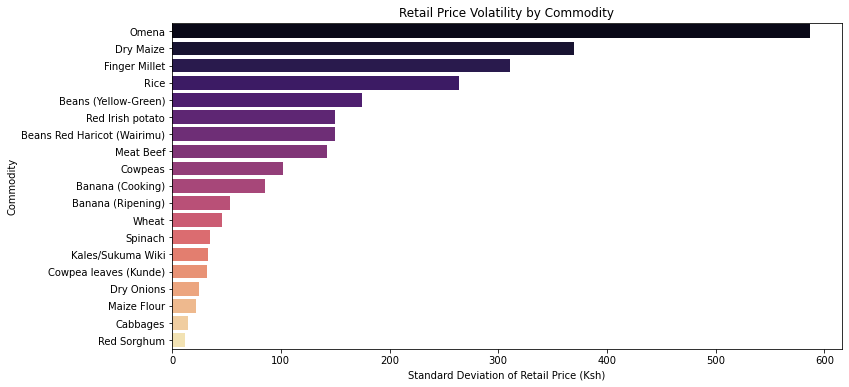

In [84]:
# Compute Volatility per Commodity 
volatility = df_complete.groupby('Commodity')['Retail'].std().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=volatility.values, y=volatility.index, palette="magma")
plt.title("Retail Price Volatility by Commodity")
plt.xlabel("Standard Deviation of Retail Price (Ksh)")
plt.ylabel("Commodity")
plt.show()



- Some commodities tend to fluctuate more, like Omena, Dry Maize, Finger Millet, and Rice.  
- These swings can affect planning for buyers and sellers.  
- Being aware of this helps in making smarter decisions around commodity prices.


In [85]:
# create a 'Month' column from the 'Date' column to analyze seasonal patterns
df_complete['Month'] = df_complete['Date'].dt.month

seasonal_pattern = (
    df_complete
    .groupby(['Commodity','Month'])['Retail']
    .mean()
    .reset_index()
)


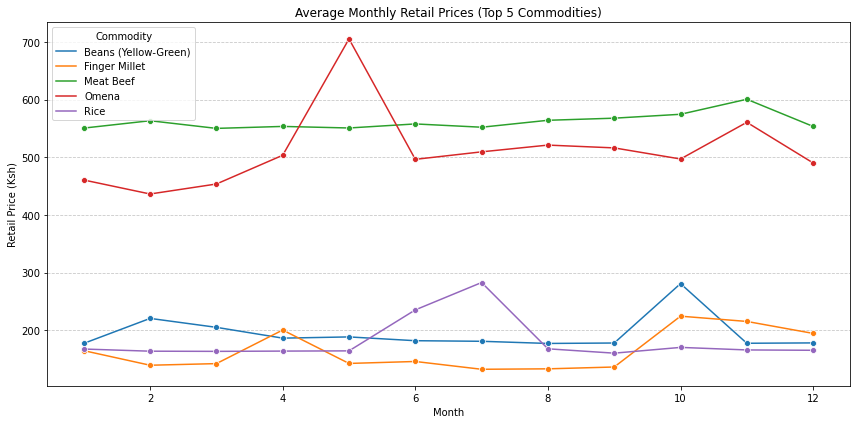

In [86]:


# Analyze seasonal patterns by month 

top_5 = df_complete.groupby('Commodity')['Retail'].mean().sort_values(ascending=False).head(5).index

seasonal_subset = seasonal_pattern[
    seasonal_pattern['Commodity'].isin(top_5)
]

plt.figure(figsize=(12,6))
sns.lineplot(data=seasonal_subset, x='Month', y='Retail', hue='Commodity', marker='o')

plt.title("Average Monthly Retail Prices (Top 5 Commodities)")
plt.xlabel("Month")
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.ylabel("Retail Price (Ksh)")

plt.tight_layout()
plt.show()



- Prices change slightly across different months.
- Some commodities show small peaks during certain seasons.
- This suggests that seasonal factors may influence price movements.


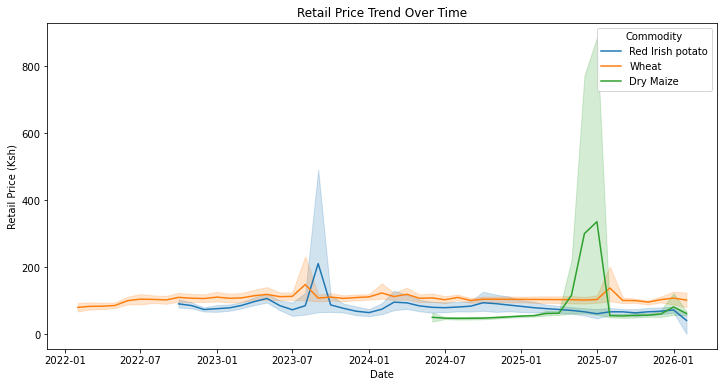

In [87]:
# Analyze price trends for key commodities
key_commodities = ["Red Irish potato","Wheat","Dry Maize"]
subset = df_complete[df_complete['Commodity'].isin(key_commodities)]

plt.figure(figsize=(12,6))
sns.lineplot(data=subset, x='Date', y='Retail', hue='Commodity')
plt.title("Retail Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Retail Price (Ksh)")
plt.show()



- The prices go up and down over time.
- Dry Maize changes more sharply than Wheat and Red Irish Potato.
- The three commodities seem to move in similar directions most of the time.
- Sudden increases may be linked to supply challenges or market changes.


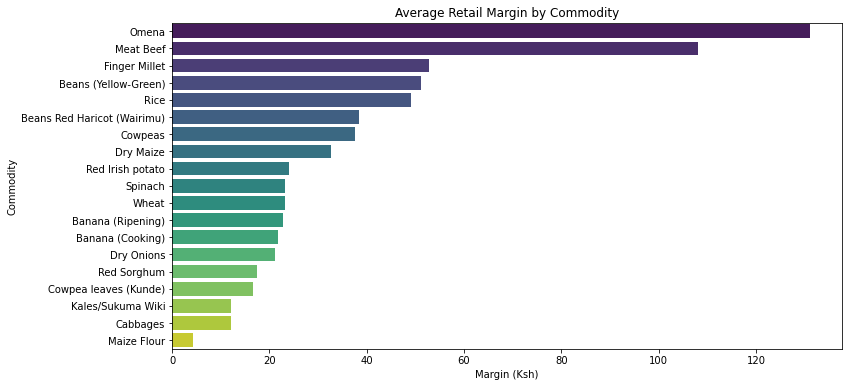

In [88]:
# compute average Retail margin (Retail - Wholesale) per commodity
df_complete['Margin'] = df_complete['Retail'] - df_complete['Wholesale']

margin_avg = df_complete.groupby('Commodity')['Margin'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=margin_avg.values, y=margin_avg.index, palette="viridis")
plt.title("Average Retail Margin by Commodity")
plt.xlabel("Margin (Ksh)")
plt.ylabel("Commodity")
plt.show()



- The margin (Retail − Wholesale) shows how much profit each commodity makes.  
- Commodities with higher margins indicate more profitable items.  (Omena, Dry Maize, Finger Millet)
- Useful for understanding market efficiency and identifying high-margin opportunities
- Useful for traders and buyers to make informed decisions.


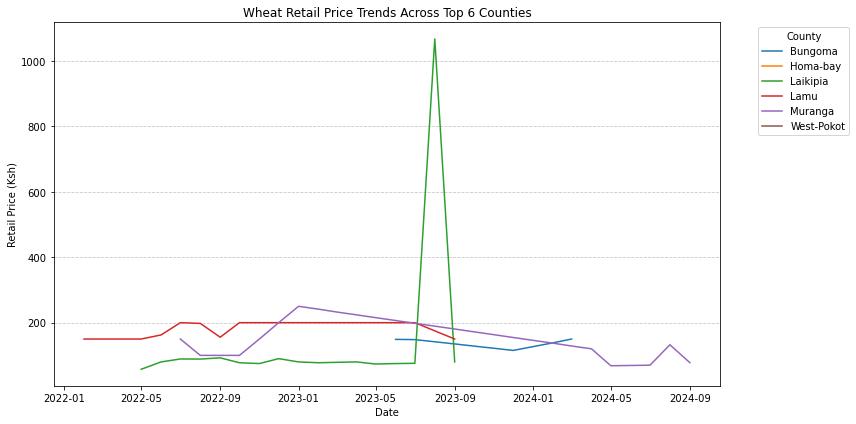

In [89]:
# Analyze Wheat price trends across top 6 counties
commodity = "Wheat"

subset = df_complete[df_complete['Commodity'] == commodity]

top_6 = subset.groupby('County')['Retail'].mean().sort_values(ascending=False).head(6).index

subset = subset[subset['County'].isin(top_6)]

plt.figure(figsize=(12,6))
sns.lineplot(data=subset, x='Date', y='Retail', hue='County')

plt.title("Wheat Retail Price Trends Across Top 6 Counties")
plt.xlabel("Date")
plt.ylabel("Retail Price (Ksh)")
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.legend(title="County", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



- Wheat prices vary across counties over time.
- Some counties consistently record higher prices than others.
- The trends generally move in similar directions, showing shared market influences.
- Occasional spikes may reflect temporary supply or demand shocks.


## Feature Engineering

In [90]:
# Make a copy to avoid modifying original dataset
df_model = df_complete.copy()


In [91]:
# Converts Date column into a proper datetime format 
df_model['Date'] = pd.to_datetime(df_model['Date'])


In [92]:
# Sort data by County, Commodity, Date 
df_model = df_model.sort_values(
    by=['County', 'Commodity', 'Date']
).reset_index(drop=True)


In [93]:
# Fill missing values within each County-Commodity group
df_model[['Retail','Wholesale']] = (
    df_model
    .groupby(['County','Commodity'])[['Retail','Wholesale']]
    .transform(lambda x: x.interpolate())
)

df_model[['Retail','Wholesale']] = (
    df_model
    .groupby(['County','Commodity'])[['Retail','Wholesale']]
    .transform(lambda x: x.ffill().bfill())
)

In [94]:
# Compute Margin for modeling/Calculates profit difference
df_model['Margin'] = df_model['Retail'] - df_model['Wholesale']


In [95]:
# Calculate percentage change in Retail and Wholesale prices within each County-Commodity group
df_model['Retail_pct_change'] = (
    df_model
    .groupby(['County','Commodity'])['Retail']
    .pct_change()
)

df_model['Wholesale_pct_change'] = (
    df_model
    .groupby(['County','Commodity'])['Wholesale']
    .pct_change()
)


In [96]:
# Add Rolling / Moving Averages
window = 3  # 3-month rolling window

df_model['Retail_MA3'] = (
    df_model
    .groupby(['County','Commodity'])['Retail']
    .transform(lambda x: x.rolling(window, min_periods=1).mean())
)

df_model['Wholesale_MA3'] = (
    df_model
    .groupby(['County','Commodity'])['Wholesale']
    .transform(lambda x: x.rolling(window, min_periods=1).mean())
)

In [97]:
# Extract date features 
df_model['Year'] = df_model['Date'].dt.year
df_model['Month'] = df_model['Date'].dt.month
df_model['Quarter'] = df_model['Date'].dt.quarter

In [98]:
# Create a 'Season' column based on the month to capture seasonal effects
def month_to_season(month):
    if month in [3,4,5]:
        return 'Long Rains'
    elif month in [10,11,12]:
        return 'Short Rains'
    else:
        return 'Dry Season'

df_model['Season'] = df_model['Month'].apply(month_to_season)

In [99]:
# Drop any remaining rows with missing values in key columns 
df_model = df_model.dropna().reset_index(drop=True)


In [100]:
# Final check of the dataset before modeling
print("Final Dataset Shape:", df_model.shape)
print("\nColumns:\n", df_model.columns)
print("\nMissing Values:\n", df_model.isna().sum())


Final Dataset Shape: (8555, 14)

Columns:
 Index(['Date', 'County', 'Commodity', 'Retail', 'Wholesale', 'Month', 'Margin',
       'Retail_pct_change', 'Wholesale_pct_change', 'Retail_MA3',
       'Wholesale_MA3', 'Year', 'Quarter', 'Season'],
      dtype='object')

Missing Values:
 Date                    0
County                  0
Commodity               0
Retail                  0
Wholesale               0
Month                   0
Margin                  0
Retail_pct_change       0
Wholesale_pct_change    0
Retail_MA3              0
Wholesale_MA3           0
Year                    0
Quarter                 0
Season                  0
dtype: int64


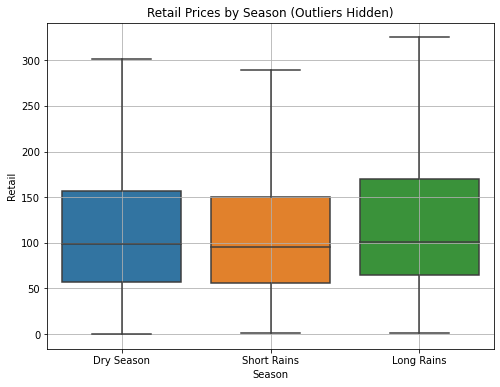

In [101]:
# Distribution of Retail prices by Season

plt.figure(figsize=(8,6))
sns.boxplot(x='Season', y='Retail', data=df_model, showfliers=False)
plt.title("Retail Prices by Season (Outliers Hidden)")
plt.grid(True)
plt.show()


Retail prices are fairly similar across seasons, although the Long Rains season shows slightly higher variability. Seasonal differences exist but are not very large. This suggests that season has some impact on prices

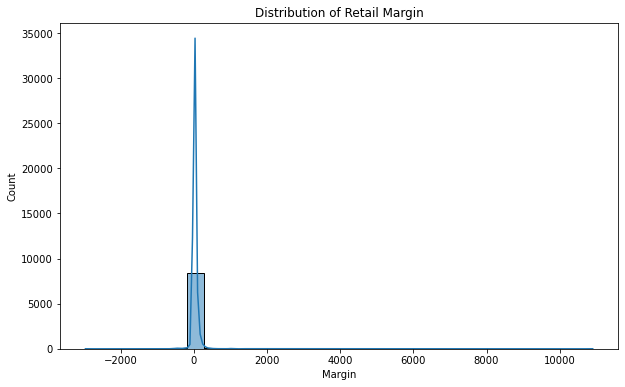

In [102]:
# Distribution of Retail Margin
plt.figure(figsize=(10,6))
sns.histplot(df_model['Margin'], bins=30, kde=True)
plt.title("Distribution of Retail Margin")
plt.show()


Most retail margins are small, with a few extreme high values. The distribution is highly skewed, so the median is a better measure than the mean.

## Feature Selection

In [103]:
# # Make a copy of the feature-engineered dataset
df_features = df_model.copy()


In [104]:
# create lag features for Retail and Wholesale prices

# Define how many past months we want to look at
lag_months = [1, 2, 3]  # previous 1, 2, and 3 months

# Create lag features
for lag in lag_months:
    df_features[f'Retail_lag{lag}'] = df_features.groupby(['County', 'Commodity'])['Retail'].shift(lag)
    df_features[f'Wholesale_lag{lag}'] = df_features.groupby(['County', 'Commodity'])['Wholesale'].shift(lag)


In [105]:
# feature columns for modeling
feature_cols = [
    'Wholesale',
    'Margin',
    'Retail_pct_change',
    'Wholesale_pct_change',
    'Retail_MA3',
    'Wholesale_MA3',
    'Month',
    'Quarter',
    'Season',
    'Year',
    'County',
    'Commodity'
]

# lag features 
lag_cols = [f'Retail_lag{lag}' for lag in lag_months] + [f'Wholesale_lag{lag}' for lag in lag_months]
feature_cols += lag_cols


In [106]:
# Drop rows with missing values 
df_features_model = df_features.dropna(subset=feature_cols + ['Retail']).reset_index(drop=True)


In [107]:
# One-hot encode categorical features for ML
categorical_features = ['County', 'Commodity', 'Season', 'Month', 'Quarter']

df_features_model = pd.get_dummies(df_features_model, columns=categorical_features, drop_first=True)


In [108]:
#  feature and target separation
X = df_features_model.drop(columns=['Retail','Date','Wholesale_pct_change','Retail_pct_change'])  # predictors
y = df_features_model['Retail']  # target


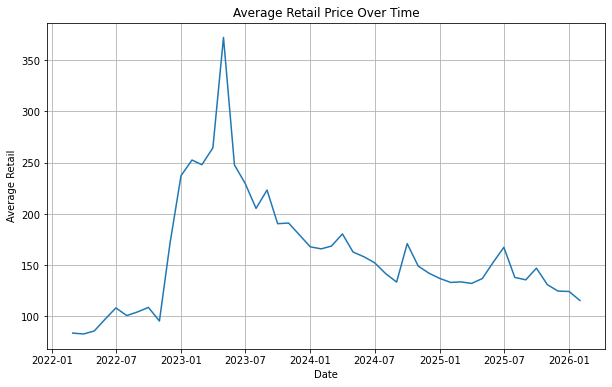

In [109]:
# Analyze average retail price trends over time
monthly_avg = df_model.groupby(['Date'])['Retail'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.plot(monthly_avg['Date'], monthly_avg['Retail'])
plt.title("Average Retail Price Over Time")
plt.xlabel("Date")
plt.ylabel("Average Retail")
plt.grid(True)
plt.show()


Retail prices were stable in 2022, increased sharply in 2023, and then gradually declined and stabilized from 2024 onward. The 2023 spike appears to be an unusual market event.(The spike may be due to supply or economic factors.)

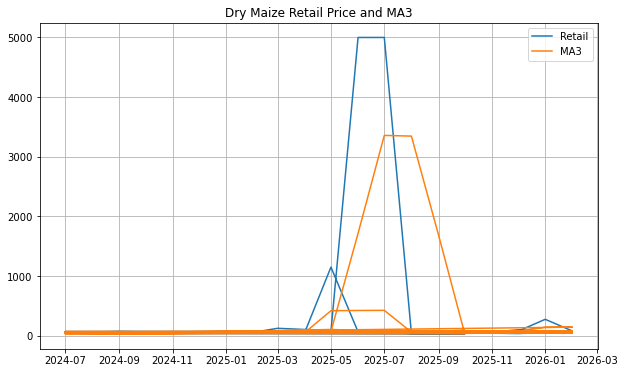

In [110]:
# Analyze price trends for Dry Maize
commodity = "Dry Maize"

data = df_model[df_model['Commodity'] == commodity]

plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Retail'])
plt.plot(data['Date'], data['Retail_MA3'])
plt.title(f"{commodity} Retail Price and MA3")
plt.legend(['Retail','MA3'])
plt.grid(True)
plt.show()


## Modelling 

In [111]:
# Check date range of the dataset
print(df_model['Date'].min())
print(df_model['Date'].max())


2022-03-01 00:00:00
2026-02-01 00:00:00


In [112]:
# lag features + one-hot encoded categorical columns
lag_cols = [
    'Retail_lag1','Wholesale_lag1',
    'Retail_lag2','Wholesale_lag2',
    'Retail_lag3','Wholesale_lag3'
]

categorical_cols = [col for col in df_features_model.columns if col.startswith(('County_','Commodity_','Season_','Month_','Quarter_'))]

# Final feature columns
feature_cols = lag_cols + categorical_cols


In [113]:
# split based on date to avoid data leakage in time series forecasting
split_date = '2025-02-01'

train = df_features_model[df_features_model['Date'] <= split_date]
test  = df_features_model[df_features_model['Date'] >  split_date]

X_train = train[feature_cols]
y_train = train['Retail']

X_test  = test[feature_cols]
y_test  = test['Retail']


In [114]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("LR MAE:", round(mean_absolute_error(y_test, y_pred_lr),2))
print("LR RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_lr)),2))
print("LR R²:", round(r2_score(y_test, y_pred_lr),3))


LR MAE: 33.05
LR RMSE: 143.97
LR R²: 0.516


Linear Regression captures the general price trend (R² = 0.52) but has higher average prediction error, indicating it struggles with accurately modeling price fluctuations

In [115]:
# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGB MAE:", round(mean_absolute_error(y_test, y_pred_xgb),2))
print("XGB RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_xgb)),2))
print("XGB R²:", round(r2_score(y_test, y_pred_xgb),3))

XGB MAE: 24.15
XGB RMSE: 149.9
XGB R²: 0.476


XGBoost predicts average retail prices better than Linear Regression (lower MAE), but both models struggle with sudden price spikes, so there is room for improvement using more features or sequence models.

In [116]:
# Hyperparameter tuning for XGBoost using GridSearchCV
params = {
    'n_estimators':[100,200,300],
    'max_depth':[3,5,7],
    'learning_rate':[0.05,0.1,0.2]
}

xgb_model = xgb.XGBRegressor(random_state=42)
grid = GridSearchCV(xgb_model, param_grid=params, scoring='neg_mean_absolute_error', cv=3)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)


Best params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


After hyperparameter tuning, the optimal XGBoost parameters were learning_rate = 0.05, max_depth = 5, and n_estimators = 100, indicating that a moderately deep model with a lower learning rate performs better for this dataset

In [117]:
# Best parameters from GridSearch
xgb_best = xgb.XGBRegressor(
    learning_rate=0.05,
    max_depth=5,
    n_estimators=100,
    random_state=42
)

# Train
xgb_best.fit(X_train, y_train)

# Predict
y_pred_xgb_best = xgb_best.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_xgb_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb_best))
r2 = r2_score(y_test, y_pred_xgb_best)

print("Tuned XGBoost Performance:")
print("MAE:", round(mae,2))
print("RMSE:", round(rmse,2))
print("R²:", round(r2,3))

Tuned XGBoost Performance:
MAE: 22.53
RMSE: 139.34
R²: 0.547


After hyperparameter tuning, XGBoost performance improved significantly, achieving an R² of 0.55 and lower error metrics (MAE = 22.53, RMSE = 139.34). The tuned model outperformed Linear Regression, indicating that non-linear relationships in agricultural price data are better captured using gradient boosting methods

In [118]:
# Select one commodity
commodity_name = "Wheat"

commodity_data = df_complete[df_complete['Commodity'] == commodity_name]

# Aggregate across counties (national average)
ts = (
    commodity_data
    .groupby('Date')['Retail']
    .mean()
    .sort_index()
)

ts.head()

Date
2022-02-01    79.314103
2022-03-01    82.436412
2022-04-01    82.948029
2022-05-01    85.055556
2022-06-01    99.481647
Name: Retail, dtype: float64

In [119]:
split_date = '2025-02-01'

train_ts = ts[ts.index <= split_date]
test_ts  = ts[ts.index > split_date]

print("Train size:", len(train_ts))
print("Test size:", len(test_ts))


Train size: 37
Test size: 12


In [120]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(
    train_ts,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_result = model.fit(disp=False)

print(sarima_result.summary())


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                             Retail   No. Observations:                   37
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -28.639
Date:                            Thu, 26 Feb 2026   AIC                             67.278
Time:                                    22:25:49   BIC                             68.790
Sample:                                02-01-2022   HQIC                            65.618
                                     - 02-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7913      0.206      3.843      0.000       0.388       1.195
ma.L1         -1.0000   1.58e+05  -

The SARIMA model identified significant autoregressive and seasonal patterns in wheat prices. Residual diagnostic tests indicate that the model fits the data well and successfully captures most of the time-series structure.

In [121]:
forecast = sarima_result.predict(
    start=test_ts.index[0],
    end=test_ts.index[-1]
)


In [122]:
mae = mean_absolute_error(test_ts, forecast)
rmse = np.sqrt(mean_squared_error(test_ts, forecast))
r2 = 1 - (np.sum((test_ts - forecast)**2) / np.sum((test_ts - np.mean(test_ts))**2))

print("SARIMA MAE:", round(mae,2))
print("SARIMA RMSE:", round(rmse,2))
print("SARIMA R²:", round(r2,3))


SARIMA MAE: 3.37
SARIMA RMSE: 4.47
SARIMA R²: 0.808


SARIMA significantly outperformed both Linear Regression and XGBoost, achieving the lowest MAE (3.37) and highest R² (0.81). This indicates that wheat prices exhibit strong seasonal and temporal patterns that are better captured by classical time-series modeling than feature-based machine learning models.

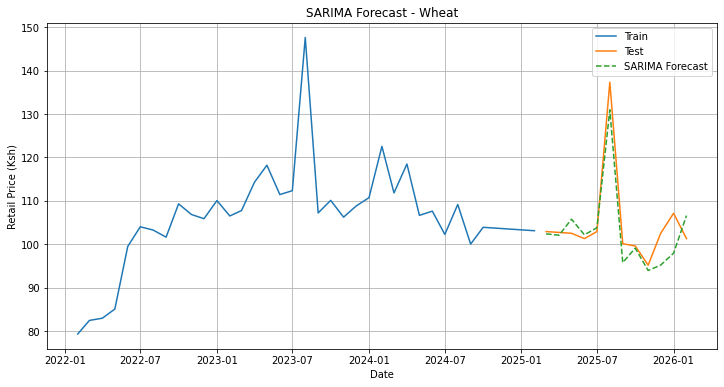

In [123]:
plt.figure(figsize=(12,6))
plt.plot(train_ts, label='Train')
plt.plot(test_ts, label='Test')
plt.plot(forecast, label='SARIMA Forecast', linestyle='--')

plt.title(f"SARIMA Forecast - {commodity_name}")
plt.xlabel("Date")
plt.ylabel("Retail Price (Ksh)")
plt.legend()
plt.grid(True)
plt.show()
